In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Heart Stroke.csv')

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

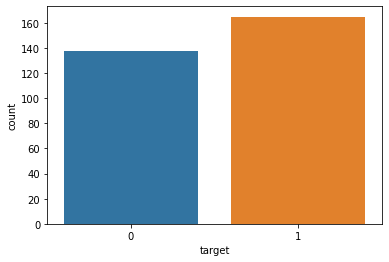

In [10]:
sns.countplot(x='target',data=df)

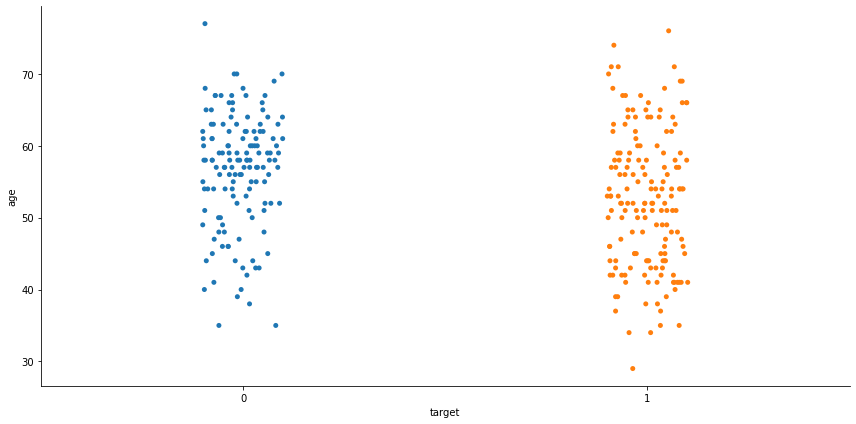

In [49]:
sns.catplot(y = "age", x = "target", data = df.sort_values("age", ascending = False), kind="strip", height = 6, aspect = 2)
plt.show()

In [12]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [14]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = mm_scaler.fit_transform(dataset[columns_to_scale])

In [15]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,0.333333,0.150943,0.315068,0.465649,0.193548,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,0.812500,0.471698,0.152968,0.534351,0.548387,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,0.583333,0.339623,0.011416,0.335878,0.193548,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


------------------------------SPLITTING THE TRAIN AND TEST DATASET----------------------------

In [17]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target',axis=1), 
                                                    dataset['target'], test_size=0.20, 
                                                    random_state=100)

In [42]:
from sklearn.linear_model import Lasso
ls= Lasso()
ls.fit(X_train,y_train)
pred = rfc.predict(X_test)
accuracy=accuracy_score(y_test,pred)
accuracy

0.8524590163934426

 ------------------------------IMPLEMENTING LOGISTIIC REGRESSION----------------------------------

In [32]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)

from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,predictions)

accuracy

array([[27,  6],
       [ 1, 27]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,predictions)
accuracy

0.8852459016393442